In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report


In [24]:
iris = pd.read_csv(r'IRIS_data.csv')
print(iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [25]:
mapping = { 
 'Iris-setosa' : 1,
 'Iris-versicolor' : 2,
 'Iris-virginica' : 3
}
x = iris.drop(['Species'], axis=1).values#Input Feature Values
y = iris.Species.replace(mapping).values # Output values
print("Size of x: ",x.shape)
print("Size of y: ",y.shape)


Size of x:  (150, 4)
Size of y:  (150,)


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state= 0)
print("Size of x_train: ",x_train.shape)
print("Size of x_test: ",x_test.shape)
print("Size of y_train: ",y_train.shape)
print("Size of y_test: ",y_test.shape)


Size of x_train:  (105, 4)
Size of x_test:  (45, 4)
Size of y_train:  (105,)
Size of y_test:  (45,)


In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Actual:\n",y_test,"\n")
print("Predicted:\n",y_pred)


Actual:
 [3 2 1 3 1 3 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 2 1 1 3 1 1 2 2 1 3 2 1 3 3 2 1
 2 2 2 3 1 3 1 1] 

Predicted:
 [3.07863376 1.96669898 0.84065941 2.82209546 0.96871345 3.29167009
 0.96673386 2.30556458 2.26630691 2.10590682 2.61291114 2.29882172
 2.24583575 2.31726102 2.35560867 0.93553118 2.37252277 2.26780932
 1.03810685 0.94698243 2.83345137 2.43872911 1.11461187 1.05223725
 2.59172014 0.8932231  1.16770375 2.17090695 1.93927314 1.10832465
 2.74781133 2.47276913 0.93279976 2.6329574  3.00469015 2.28881924
 0.95383121 2.59988104 2.30377528 2.10489089 2.84907488 0.96759161
 2.82996938 1.21809757 0.8950124 ]


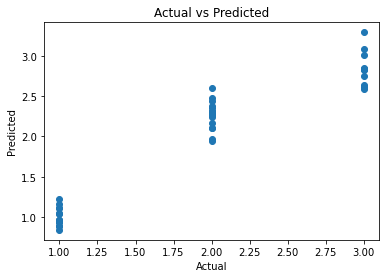

In [28]:
#Plotting the Actual vs Predicted
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'],columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Precision: ",precision_score(y_test, y_pred, average=None))
print("Recall: ",recall_score(y_test, y_pred, average=None))
print("F-1 Score:",f1_score(y_test, y_pred, average=None))
print("\nSummary:\n",classification_report(y_test, y_pred))